In [26]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [27]:
# 1. Cargar el dataset
df = pd.read_csv('Mall_Customers.csv',sep=";")

In [28]:
# Mostrar las primeras filas del dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [29]:
# Información del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


In [30]:
# Estadísticas descriptivas
print(df.describe())


       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


In [31]:
print(df.isnull().sum())
print(df.shape)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
(200, 5)


In [33]:
# Normalización de los datos
# Selección explícita de columnas numéricas (excepto CustomerID)
numeric_cols = df.drop(['CustomerID'], axis=1).select_dtypes(include=[np.number]).columns
df_scaled = scaler.fit_transform(df[numeric_cols])

#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df.drop('CustomerID', axis=1))

In [34]:
# Aplicar PCA para reducción de dimensionalidad (opcional)
pca = PCA(n_components=2)  # Elegir el número de componentes principales
df_pca = pca.fit_transform(df_scaled)

In [35]:
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Componentes principales:\n{pca.components_}')

# Realizar el clustering jerárquico
Z = linkage(df_pca, method='ward')


Varianza explicada por cada componente: [0.33690046 0.26230645]
Componentes principales:
[[ 0.23430156  0.68790025 -0.00608217 -0.68691996]
 [ 0.62688553 -0.10368955  0.7652519   0.10321115]]


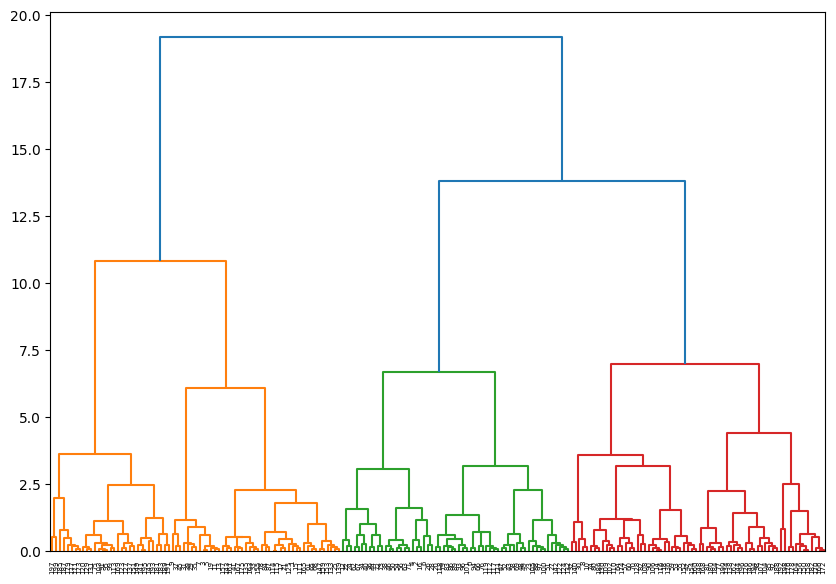

In [36]:
# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()


In [37]:
# Entrenar el modelo con un número específico de clusters
model = AgglomerativeClustering(n_clusters=3)
model.fit(df_pca)
labels = model.labels_


In [38]:
# Evaluar el desempeño del modelo
silhouette_avg = silhouette_score(df_pca, labels)
calinski_harabasz = calinski_harabasz_score(df_pca, labels)

In [39]:
print(f'Coeficiente de Silhouette: {silhouette_avg}')
print(f'Índice de Calinski-Harabasz: {calinski_harabasz}')

Coeficiente de Silhouette: 0.36155893704686315
Índice de Calinski-Harabasz: 137.1358028581256


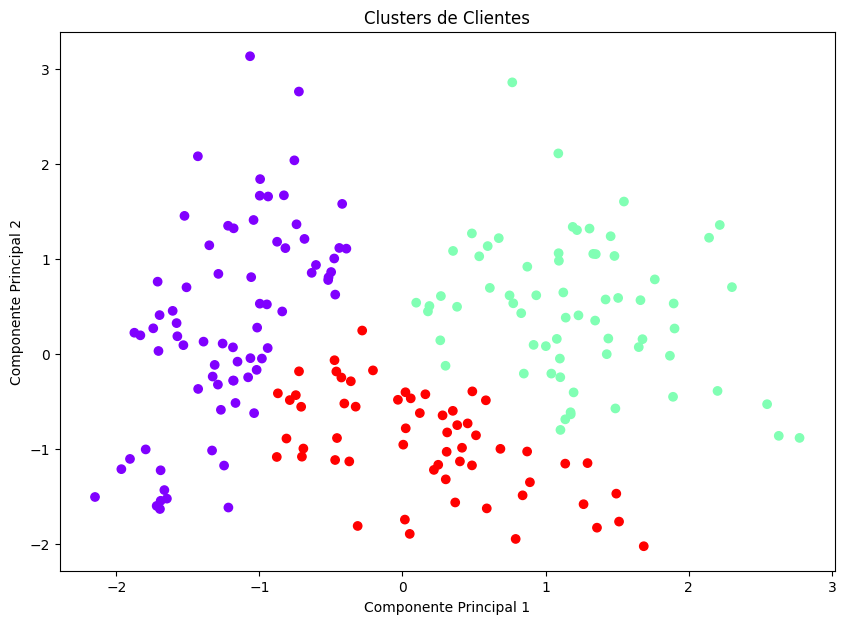

In [40]:
# Visualización de clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Clientes')
plt.show()